## Simple network graph using NetworkX
---

#### 1) Import libraries

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pathlib2 import Path

networkx==2.6.2
pandas==1.2.4
matplotlib==3.4.2
pathlib2==2.3.5

#### 2) Import data

In [2]:
oecd_data = Path.joinpath(Path.cwd().parent, 'Raw Data', 'OECD-Tech-collab-develop-bilateral.csv')
oecd_data_df = pd.read_csv(oecd_data)

#### 3) Select data aspect
- identify a data variable to generate chart

In [4]:
select_domain = 'Climate change mitigation'
oecd_data_df_sel = oecd_data_df[oecd_data_df['Techology domain']==select_domain][['Country', 'Partner', 'Value']]
oecd_data_df_sel = oecd_data_df_sel.groupby(['Country', 'Partner'])['Value'].agg('sum').rename('Total').reset_index()
oecd_data_df_sel.replace({"China (People's Republic of)": 'PRC', 
                         'United Kingdom': 'UK', 
                         'United States': 'US'}, inplace=True)

- generate edge weights based on quartile metrics of data variable

In [5]:
oecd_data_df_sel['Relative Weight'] = oecd_data_df_sel['Total'] / oecd_data_df_sel['Total'].sum(axis=0)
q1 = oecd_data_df_sel['Relative Weight'].quantile(0.25)
median = oecd_data_df_sel['Relative Weight'].quantile(0.5)
q3 = oecd_data_df_sel['Relative Weight'].quantile(0.75)

#### 4) Set-up network edge weights

In [6]:
G = nx.from_pandas_edgelist(oecd_data_df_sel, source='Country', target='Partner', edge_attr='Relative Weight', create_using=nx.DiGraph)
edge_strong = [(s, t) for (s, t, d) in G.edges(data=True) if d['Relative Weight'] >= q3]
edge_moderate = [(s, t) for (s, t, d) in G.edges(data=True) if q3 > d['Relative Weight'] >= median]
edge_weak = [(s, t) for (s, t, d) in G.edges(data=True) if median > d['Relative Weight'] >= q1]
edge_veryweak = [(s, t) for (s, t, d) in G.edges(data=True) if d['Relative Weight'] < q1]

#### 5) Generate network structure with nodes/weights from dataset

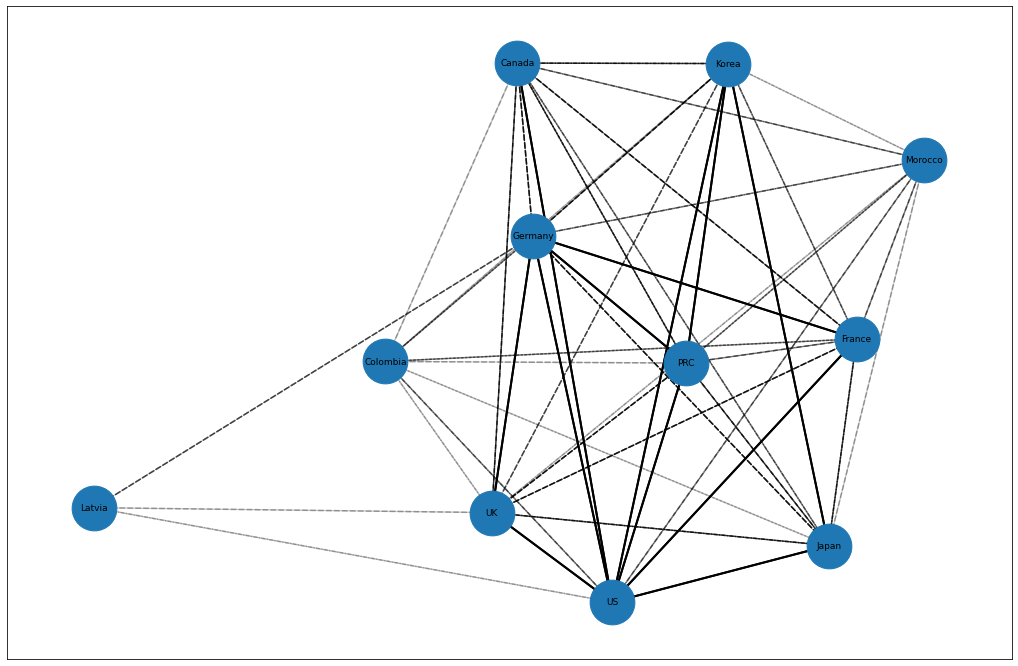

In [35]:
plt.figure(figsize=(18,12))
pos=nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=2000)

# edges
nx.draw_networkx_edges(G, pos, edgelist=edge_strong, width=2)
nx.draw_networkx_edges(G, pos, edgelist=edge_moderate, width=1.5, alpha=0.75, style='dashed')
nx.draw_networkx_edges(G, pos, edgelist=edge_weak, width=1.5, alpha=0.5, style='dashed')
nx.draw_networkx_edges(G, pos, edgelist=edge_veryweak, width=1.5, alpha=0.25, style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')
plt.show();